C:\Users\rajat\.anaconda\Lib\site-packages\paramiko\pkey.py:82: CryptographyDeprecationWarning: TripleDES has been moved to cryptography.hazmat.decrepit.ciphers.algorithms.TripleDES and will be removed from this module in 48.0.0.
  "cipher": algorithms.TripleDES,
C:\Users\rajat\.anaconda\Lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been moved to cryptography.hazmat.decrepit.ciphers.algorithms.Blowfish and will be removed from this module in 45.0.0.
  "class": algorithms.Blowfish,
C:\Users\rajat\.anaconda\Lib\site-packages\paramiko\transport.py:243: CryptographyDeprecationWarning: TripleDES has been moved to cryptography.hazmat.decrepit.ciphers.algorithms.TripleDES and will be removed from this module in 48.0.0.
  "class": algorithms.TripleDES,


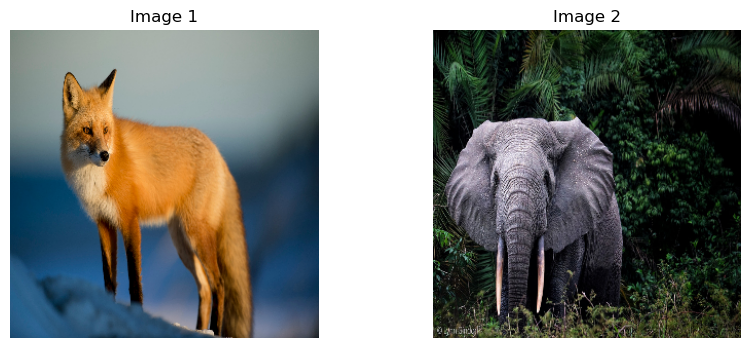

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.metrics import mean_squared_error

img1 = cv2.imread('Animal.jpg')
img2 = cv2.imread('elephant.jpg')

img1 = cv2.resize(img1, (300,300))
img2 = cv2.resize(img2, (300,300))

img1_rgb = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img2_rgb = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(10,4))
plt.subplot(1, 2, 1)
plt.imshow(img1_rgb)
plt.title("Image 1")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(img2_rgb)
plt.title("Image 2")
plt.axis('off')
plt.show()

In [4]:
def compare_histograms(image1, image2):
    score = 0
    for i in range(3):
        hist1 = cv2.calcHist([image1], [i], None, [256], [0, 256])
        hist2 = cv2.calcHist([image2], [i], None, [256], [0, 256])
        cv2.normalize(hist1, hist1)
        cv2.normalize(hist2, hist2)
        score+= cv2.compareHist(hist1, hist2, cv2.HISTCMP_INTERSECT)
    return score / 3

hist_score = compare_histograms(img1_rgb,img2_rgb)
print(f"Histogram Similarity Score (Higher = More Similar): {hist_score:.2f}")

Histogram Similarity Score (Higher = More Similar): 4.41


In [5]:
#Mean Scquared Error
mse_score = mean_squared_error(img1_rgb.astype("float"), img2_rgb.astype("float"))
print(f"Mean Squared Error (Lower = More Similar): {mse_score:.2f}")

Mean Squared Error (Lower = More Similar): 9577.11


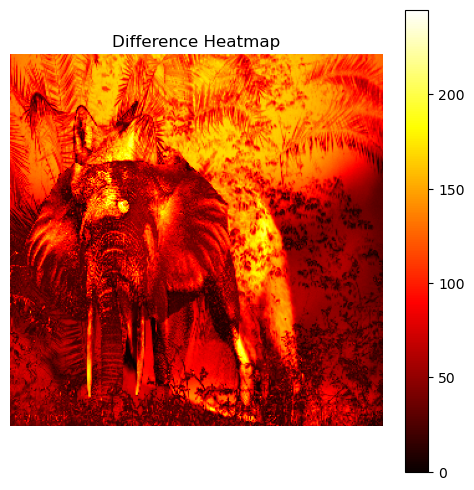

In [6]:
diff = cv2.absdiff(img1_rgb, img2_rgb)
gray_diff = cv2.cvtColor(diff, cv2.COLOR_RGB2GRAY)

plt.figure(figsize=(6, 6))
plt.imshow(gray_diff, cmap='hot')
plt.title("Difference Heatmap")
plt.colorbar()
plt.axis('off')
plt.show()